### Kalman Filters for Time Series Smoothing

Here, we will go a bit in depth with how to build a kalman filter in python for some price time series. For this, we will use the TLT ETF price time series to play around with. This is inspired from the book **Machine Learning for Trading** by Stefan Jansen. 

In [1]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt

from pykalman import KalmanFilter

In [2]:
# Implementing a dead simple kalman filter using pykalman

kf = KalmanFilter(
    transition_matrices = [1], 
    observation_matrices = [1], 
    initial_state_mean=0, 
    initial_state_covariance=1, 
    observation_covariance=1, 
    transition_covariance=0.01
)

In [4]:
ticker = 'TLT'
data = yf.download(ticker, progress=False)
price_series = data['Adj Close']

In [6]:
state_means, y = kf.filter(price_series)

In [18]:
df = pd.DataFrame() 

df['close'] = price_series
df['kf'] = state_means

# Then we are going to add some moving averages
df['SMA_10'] = df['close'].rolling(10).mean() 
df['SMA_25'] = df['close'].rolling(25).mean() 
df['SMA_50'] = df['close'].rolling(50).mean()
df['SMA_100'] = df['close'].rolling(100).mean()

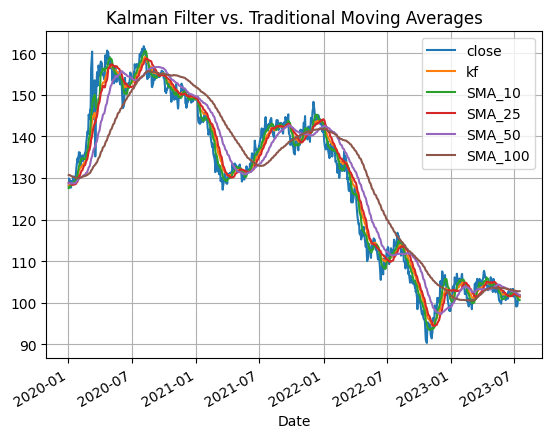

In [19]:
df.loc["2020-01-01":].plot()
plt.title("Kalman Filter vs. Traditional Moving Averages")
plt.grid()
plt.show()

We can see that the Kalman Filter does a good job of folling the current price and seems like a faster moving average compared to the other ones. This is because it responds to new data points in a way that is optimal. 